In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

To download the data i use the yfinance command, it is a fast way to obtain data 
directly from Yahoo finance, you have only to set tickets and the period of time as i have done below.
I use INTEL STOCK  from the first October 2019 to the first October 2022.

In [34]:
INTC= yf.download("INTC", start= '2019-10-01', end= '2022-10-01', progress= False)

I check if the data are correctly downloaded showing the first and the last 3 observation

In [40]:
INTC.head(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-30,51.189999,51.599998,50.939999,51.529999,47.513226,13652100


In [45]:
INTC.tail(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-28,26.860001,27.280001,26.600000,27.129999,27.129999,40433400
2022-09-29,26.780001,26.780001,26.190001,26.379999,26.379999,41831300
2022-09-30,26.299999,26.570000,25.740000,25.770000,25.770000,43675100


We have to use the close price in order to calculate returns, i  extract from the dataframe all the observation that i need.

In [42]:
INTC_price=INTC.loc[:,['Close']]
INTC_price.head(3)

,Close
Date,
2019-09-30,51.529999
2019-10-01,50.759998
2019-10-02,49.389999


In [43]:
INTC_price.tail(3)

,Close
Date,
2022-09-28,27.129999
2022-09-29,26.379999
2022-09-30,25.770000


Now we can calculate the log returns.
Is important using .dropna() to delete the loss of the first observation due to calculation of return between days.

In [46]:
INTC_lret=np.log(INTC_price).diff().dropna()
INTC_lret.head(3)

,Close
Date,
2019-10-01,-0.015056
2019-10-02,-0.027361
2019-10-03,0.012875


To graphically perform autocorrelation i use statsmodels.graphis package, in particular tsaplots.
You can follow the code bellow to import the libraries that we need.

In [47]:
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

After that all the packages are imported without errors we can start:
We have to define the variable associate with the graph, in this case we can call it fig:
   
   fig=tsaplots.plot_acf(our stock log return, lags=n,color='color')

*The tsaplots.plot_acf represent the command that allow us to display tha autocorrelation.

After the command you have to add (between curly brackets) the returns in this case Intel log returns.
Chose how many lags we want; usually we set 100 lags.
Decide which color apply, remember to put it between quotation marks "" .

IMPORTANT: each input in the code have to be separated using the comma ,

If you would like to increase the dimension of the graph use this command:
              plt.rcParams["figure.figsize"] = (12, 8)

*Where the first input(x) is the lenght of the graph in this case 12 and the second (Y) is the height

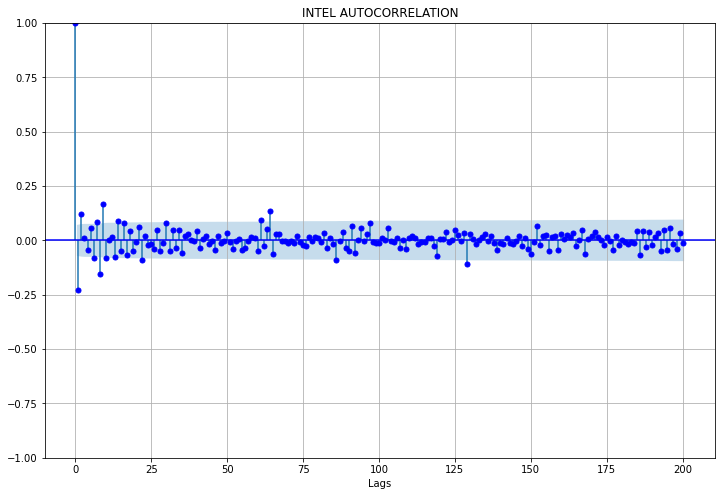

In [52]:
fig = tsaplots.plot_acf(INTC_lret, lags=200, color='Blue')
plt.xlabel('Lags')
plt.ylabel('')
plt.title('INTEL AUTOCORRELATION')
plt.grid()
plt.rcParams["figure.figsize"] = (12, 8)
plt.show()

Comment final result:

How we can expect performing autocorrelation between log returns, we can clearly see how the first value is 1
and after that all of the other points are around the zero suggesting the lack of the correlation between log returns.
If the values were not near 0 we will be able to know how the stock will performe tommorow, however this is not possible, so if you have something that do not follow a similar path you have done some errors.

Autoccorelation with Log^(2)

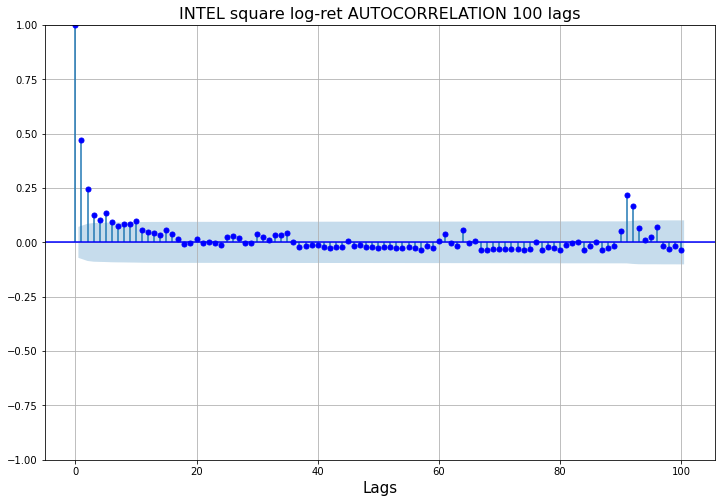

In [51]:
fig = tsaplots.plot_acf(INTC_lret**2, lags=100,color='Blue')
plt.xlabel('Lags',fontsize=15)
plt.ylabel('')
plt.title('INTEL square log-ret AUTOCORRELATION 100 lags',fontsize=16)
plt.grid()
plt.rcParams["figure.figsize"] = (12, 8)
plt.show()

Comment final result:
If we will performe the same process but on the square log returns we can clearly see how different are the result, the graph underline an increase in terms of autocorrelation comparing with the simple log returns.